**This notebook is an exercise in the [Intermediate Machine Learning](https://www.kaggle.com/learn/intermediate-machine-learning) course.  You can reference the tutorial at [this link](https://www.kaggle.com/alexisbcook/introduction).**

---


As a warm-up, you'll review some machine learning fundamentals and submit your initial results to a Kaggle competition.

# Setup

The questions below will give you feedback on your work. Run the following cell to set up the feedback system.

In [1]:
# Set up code checking
import os
if not os.path.exists("../input/train.csv"):
    os.symlink("../input/home-data-for-ml-course/train.csv", "../input/train.csv")  
    os.symlink("../input/home-data-for-ml-course/test.csv", "../input/test.csv")  
from learntools.core import binder
binder.bind(globals())
from learntools.ml_intermediate.ex1 import *
print("Setup Complete")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Setup Complete


You will work with data from the [Housing Prices Competition for Kaggle Learn Users](https://www.kaggle.com/c/home-data-for-ml-course) to predict home prices in Iowa using 79 explanatory variables describing (almost) every aspect of the homes.  

![Ames Housing dataset image](https://storage.googleapis.com/kaggle-media/learn/images/lTJVG4e.png)

Run the next code cell without changes to load the training and validation features in `X_train` and `X_valid`, along with the prediction targets in `y_train` and `y_valid`.  The test features are loaded in `X_test`.  (_If you need to review **features** and **prediction targets**, please check out [this short tutorial](https://www.kaggle.com/dansbecker/your-first-machine-learning-model).  To read about model **validation**, look [here](https://www.kaggle.com/dansbecker/model-validation).  Alternatively, if you'd prefer to look through a full course to review all of these topics, start [here](https://www.kaggle.com/learn/machine-learning).)_

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
X_full = pd.read_csv('../input/train.csv', index_col='Id')
X_test_full = pd.read_csv('../input/test.csv', index_col='Id')

# Obtain target and predictors
y = X_full.SalePrice
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = X_full[features].copy()
X_test = X_test_full[features].copy()

# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

Use the next cell to print the first several rows of the data. It's a nice way to get an overview of the data you will use in your price prediction model.

In [3]:
X_train.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
Id,,,,,,,
619,11694,2007,1828,0,2,3,9
871,6600,1962,894,0,1,2,5
93,13360,1921,964,0,1,2,5
818,13265,2002,1689,0,2,3,7
303,13704,2001,1541,0,2,3,6


The next code cell defines five different random forest models.  Run this code cell without changes.  (_To review **random forests**, look [here](https://www.kaggle.com/dansbecker/random-forests)._)

In [4]:
from sklearn.ensemble import RandomForestRegressor

# Define the models
model_1 = RandomForestRegressor(n_estimators=50, random_state=0)
model_2 = RandomForestRegressor(n_estimators=100, random_state=0)
model_3 = RandomForestRegressor(n_estimators=100, criterion='absolute_error', random_state=0)
model_4 = RandomForestRegressor(n_estimators=200, min_samples_split=20, random_state=0)
model_5 = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=0)

models = [model_1, model_2, model_3, model_4, model_5]

To select the best model out of the five, we define a function `score_model()` below.  This function returns the mean absolute error (MAE) from the validation set.  Recall that the best model will obtain the lowest MAE.  (_To review **mean absolute error**, look [here](https://www.kaggle.com/dansbecker/model-validation).)_

Run the code cell without changes.

Model 1 MAE: 24015
Model 2 MAE: 23740
Model 3 MAE: 23528
Model 4 MAE: 23996
Model 5 MAE: 23706


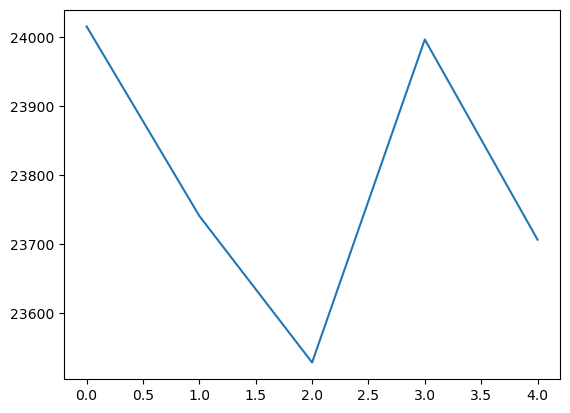

In [5]:
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt 

# Function for comparing different models
def score_model(model, X_t=X_train, X_v=X_valid, y_t=y_train, y_v=y_valid):
    model.fit(X_t, y_t)
    preds = model.predict(X_v)
    return mean_absolute_error(y_v, preds)

mae_list = []
for i in range(0, len(models)):
    mae = score_model(models[i])
    mae_list.append(mae)
    print("Model %d MAE: %d" % (i+1, mae))
    
plt.plot(mae_list)
plt.show()

# Step 1: Evaluate several models

Use the above results to fill in the line below.  Which model is the best model?  Your answer should be one of `model_1`, `model_2`, `model_3`, `model_4`, or `model_5`.

In [6]:
# Fill in the best model
best_model = model_3

# Check your answer
step_1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [7]:
# Lines below will give you a hint or solution code
#step_1.hint()
#step_1.solution()

# Step 2: Generate test predictions

Great. You know how to evaluate what makes an accurate model. Now it's time to go through the modeling process and make predictions. In the line below, create a Random Forest model with the variable name `my_model`.

In [8]:
# Define a model
my_model = model_3 # Your code here

# Check your answer
step_2.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [9]:
# Lines below will give you a hint or solution code
#step_2.hint()
#step_2.solution()

Run the next code cell without changes.  The code fits the model to the training and validation data, and then generates test predictions that are saved to a CSV file.  These test predictions can be submitted directly to the competition!

In [10]:
# Fit the model to the training data
my_model.fit(X, y)

# Generate test predictions
preds_test = my_model.predict(X_test)

# Save predictions in format used for competition scoring
output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': preds_test})
output.to_csv('submission.csv', index=False)

# Submit your results

Once you have successfully completed Step 2, you're ready to submit your results to the leaderboard!  First, you'll need to join the competition if you haven't already.  So open a new window by clicking on [this link](https://www.kaggle.com/c/home-data-for-ml-course).  Then click on the **Join Competition** button.  _(If you see a "Submit Predictions" button instead of a "Join Competition" button, you have already joined the competition, and don't need to do so again.)_

Next, follow the instructions below:
1. Begin by clicking on the **Save Version** button in the top right corner of the window.  This will generate a pop-up window.  
2. Ensure that the **Save and Run All** option is selected, and then click on the **Save** button.
3. This generates a window in the bottom left corner of the notebook.  After it has finished running, click on the number to the right of the **Save Version** button.  This pulls up a list of versions on the right of the screen.  Click on the ellipsis **(...)** to the right of the most recent version, and select **Open in Viewer**.  This brings you into view mode of the same page. You will need to scroll down to get back to these instructions.
4. Click on the **Data** tab near the top of the screen.  Then, click on the file you would like to submit, and click on the **Submit** button to submit your results to the leaderboard.

You have now successfully submitted to the competition!

If you want to keep working to improve your performance, select the **Edit** button in the top right of the screen. Then you can change your code and repeat the process. There's a lot of room to improve, and you will climb up the leaderboard as you work.


# Keep going

You've made your first model. But how can you quickly make it better?

Learn how to improve your competition results by incorporating columns with **[missing values](https://www.kaggle.com/alexisbcook/missing-values)**.

---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/intermediate-machine-learning/discussion) to chat with other learners.*